# **성능관리_종합실습**

## **(1) 환경준비**

### **1) 라이브러리 불러오기**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

from keras.datasets import fashion_mnist

### **2) 함수만들기**

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### **3) 데이터 로딩**

In [3]:
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

rd.seed(20)
tr_id = rd.sample(range(60000), 4000)
va_id = rd.sample(range(10000), 1000)

x_train, y_train = x_train[tr_id], y_train[tr_id]
x_val, y_val = x_val[va_id], y_val[va_id]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **4) 데이터 둘러보기**

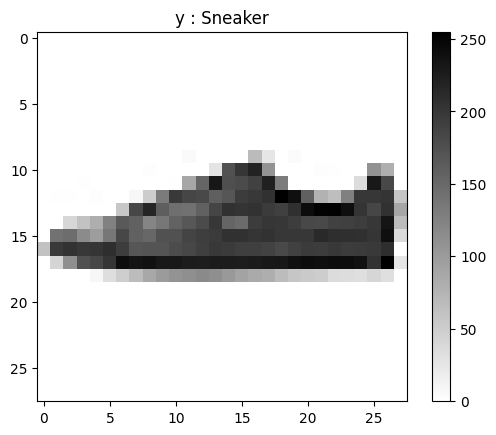

In [13]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 777
i = y_val[n]

plt.imshow(x_val[n], cmap=plt.cm.binary)
plt.title(f'y : {class_names[i]}')
plt.colorbar()
plt.show()

## **(2) 데이터준비**

### 1) 데이터 2차원으로 펼치기

In [14]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((4000, 28, 28), (4000,), (1000, 28, 28), (1000,))

In [15]:
# 펼치기
x_train = x_train.reshape(4000, -1)
x_val = x_val.reshape(1000, -1)

In [16]:
x_train.shape, x_val.shape

((4000, 784), (1000, 784))

### 2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_val를 그냥 255로 나누면 됨

In [17]:
x_train = x_train / 255.
x_val = x_val / 255.

## (3) 모델링

* 히든레이어의 노드를 다음과 같이 구성합니다.
    * 128, 64, 32, 16, 10
* epoch : 50 ~
* learning_rate : 0.01 ~ 0.0001


### 1) 모델1 : 과적합 모델
* 위에서 제시한 구조대로 모델을 설계하고 학습합니다.

#### ① 모델설계

In [40]:
# feature 수
nfeatures = x_train.shape[1]

# 메모리정리
clear_session()

# 모델설계
model = Sequential(
    [Input(shape = (nfeatures,)),
     Dense(128, activation ='relu'),
     Dense(64, activation ='relu'),
     Dense(32, activation ='relu'),
     Dense(16, activation ='relu'),
     Dense(10, activation ='softmax') # 10가지 target 범주중 하나 예측

    ]
)

# 모델요약
model.summary()

# 컴파일
model.compile(optimizer = Adam(learning_rate= 0.001) , loss = 'sparse_categorical_crossentropy')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

#### ② 학습

In [41]:
# 학습
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2 , verbose =False).history

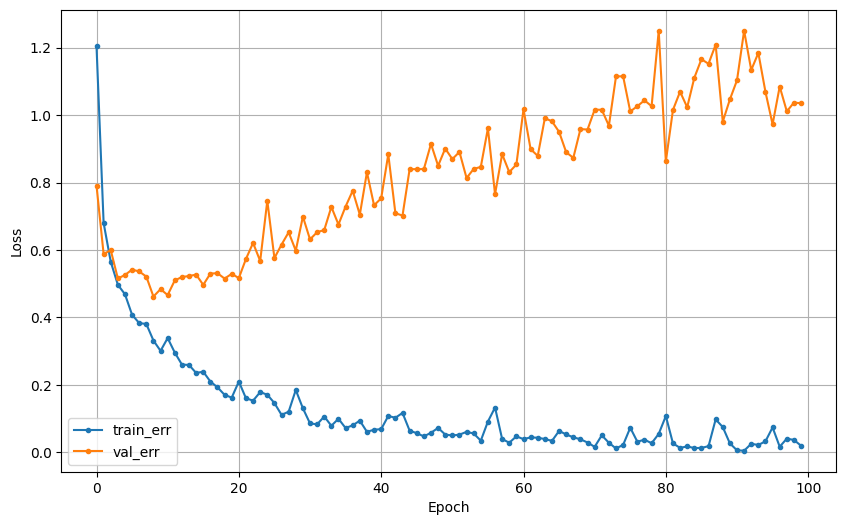

In [42]:
# 학습곡선
dl_history_plot(history)

#### ③ 예측 및 검증평가

In [43]:
# 예측
pred = model.predict(x_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [57]:
# 평가
pred = model.predict(x_val)
# softmax는 결과들 중에서 가장 유력한 것을 선택해야 함
pred = np.argmax(pred,axis=1) # target범주들 중에서 가장 유력한 것을 선택

print(accuracy_score(y_val,pred))
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0.778
[[ 65   0   3   1   1   0  25   0   4   0]
 [  0 103   1   1   1   0   0   0   0   0]
 [  0   0  74   0   2   0   9   0   2   0]
 [  1   2   1  82  13   0   5   0   0   0]
 [  0   0  64   5  24   0   3   0   3   0]
 [  0   0   0   0   0  84   0   4   0   4]
 [  8   0  25   1   6   0  50   0   3   0]
 [  0   0   0   0   0   1   0  85   0   7]
 [  0   1   0   1   0   1   2   1  92   0]
 [  0   0   0   0   0   0   0  10   0 119]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        99
           1       0.97      0.97      0.97       106
           2       0.44      0.85      0.58        87
           3       0.90      0.79      0.84       104
           4       0.51      0.24      0.33        99
           5       0.98      0.91      0.94        92
           6       0.53      0.54      0.53        93
           7       0.85      0.91      0.88        93
           8       0.88      0.94    

### 2) early stopping
* 모델1에 대해서, early stopping으로 과적합을 예방해 봅시다.

#### ① 모델설계

In [58]:
# feature 수
nfeatures = x_train.shape[1]

# 메모리정리
clear_session()

# 모델설계
model = Sequential(
    [Input(shape = (nfeatures,)),
     Dense(128, activation ='relu'),
     Dense(64, activation ='relu'),
     Dense(32, activation ='relu'),
     Dense(16, activation ='relu'),
     Dense(10, activation ='softmax') # 10가지 target 범주중 하나 예측

    ]
)

# 모델요약
model.summary()

# 컴파일
model.compile(optimizer = Adam(learning_rate= 0.001) , loss = 'sparse_categorical_crossentropy')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

#### ② 학습

In [59]:
# EarlyStopping 설정 ------------
min_de = 0.001
pat = 10

es = EarlyStopping(monitor = 'val_loss', min_delta = min_de, patience = pat)

# --------------------------------
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2 ,callbacks= [es], verbose =False).history

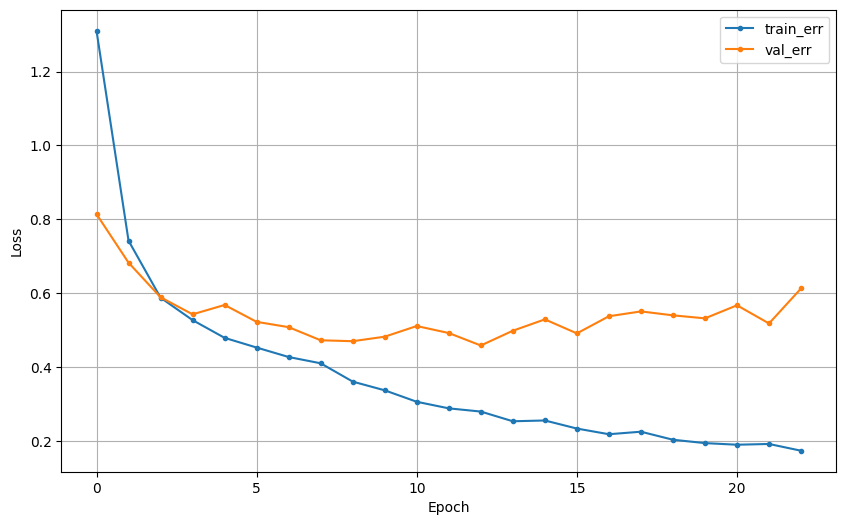

In [60]:
# 학습곡선
dl_history_plot(history)

#### ③ 예측 및 검증평가

In [61]:
# 예측
pred = model.predict(x_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [62]:
# 평가
pred = model.predict(x_val)
# softmax는 결과들 중에서 가장 유력한 것을 선택해야 함
pred = pred.argmax(axis=1) # target범주들 중에서 가장 유력한 것을 선택

print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ 76   0   1   5   1   0  12   0   4   0]
 [  1  96   0   9   0   0   0   0   0   0]
 [  2   0  58   3  14   0   8   0   2   0]
 [  2   0   1  98   2   0   1   0   0   0]
 [  0   0   8  11  73   0   5   0   2   0]
 [  0   0   0   0   0  87   0   1   0   4]
 [ 13   0   6   8  16   0  48   0   2   0]
 [  0   0   0   0   0   3   0  82   0   8]
 [  0   0   0   2   3   0   0   1  92   0]
 [  0   0   0   0   0   0   0  10   0 119]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       1.00      0.91      0.95       106
           2       0.78      0.67      0.72        87
           3       0.72      0.94      0.82       104
           4       0.67      0.74      0.70        99
           5       0.97      0.95      0.96        92
           6       0.65      0.52      0.57        93
           7       0.87      0.88      0.88        93
           8       0.90      0.94      0.92

### 3) Dropout
* 모델1에 대해서, Dropout으로 과적합을 방지해 봅시다.

#### ① 모델설계

In [64]:
# feature 수
nfeatures = x_train.shape[1]

# 메모리정리
clear_session()

drop_rate = 0.1
# 모델설계
model = Sequential(
    [Input(shape = (nfeatures,)),
     Dense(128, activation ='relu'),
     Dropout(drop_rate), # hidden Layer의 노드 중 10%를 임의로 제외
     Dense(64, activation ='relu'),
     Dropout(drop_rate), # hidden Layer의 노드 중 10%를 임의로 제외
     Dense(32, activation ='relu'),
     Dropout(drop_rate), # hidden Layer의 노드 중 10%를 임의로 제외
     Dense(16, activation ='relu'),
     Dropout(drop_rate), # hidden Layer의 노드 중 10%를 임의로 제외
     Dense(10, activation ='softmax') # 10가지 target 범주중 하나 예측

    ]
)

# 모델요약
model.summary()

# 컴파일
model.compile(optimizer = Adam(learning_rate= 0.001) , loss = 'sparse_categorical_crossentropy')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

#### ② 학습

In [65]:
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2 , verbose =False).history

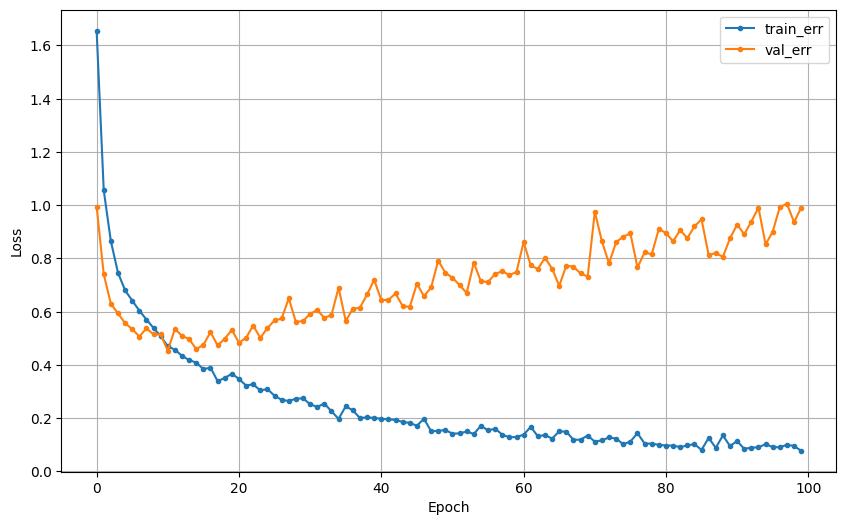

In [66]:
# 학습곡선
dl_history_plot(history)

#### ③ 예측 및 검증평가

In [67]:
# 예측
pred = model.predict(x_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [68]:
# 평가
pred = model.predict(x_val)
# softmax는 결과들 중에서 가장 유력한 것을 선택해야 함
pred = pred.argmax(axis=1) # target범주들 중에서 가장 유력한 것을 선택

print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 79   0   5   4   1   0   8   0   2   0]
 [  2 102   0   2   0   0   0   0   0   0]
 [  2   0  68   2  10   0   4   0   1   0]
 [  2   1   5  87   7   0   2   0   0   0]
 [  0   0  15   6  67   0  10   0   1   0]
 [  0   0   0   0   0  89   0   2   0   1]
 [ 13   1  11   4  10   0  53   0   1   0]
 [  0   0   0   0   0   4   0  80   0   9]
 [  1   0   3   1   4   0   1   1  87   0]
 [  0   0   0   0   0   2   0   6   0 121]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.98      0.96      0.97       106
           2       0.64      0.78      0.70        87
           3       0.82      0.84      0.83       104
           4       0.68      0.68      0.68        99
           5       0.94      0.97      0.95        92
           6       0.68      0.57      0.62        93
           7       0.90      0.86      0.88        93
           8       0.95      0.89      0.92